# CMPUT 466 Final Project
Arun Woosaree

I will be doing binary classification with 3 different algorithms to detect spam in emails

In [1]:
%%bash
pipenv install
kaggle datasets download -d uciml/sms-spam-collection-dataset
unzip -f sms-spam-collection-dataset.zip

Installing dependencies from Pipfile.lock (5c885b)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sms-spam-collection-dataset.zip


Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop the useless columns and rename spam: 1 ham: 0
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
data.replace({'spam': 1, 'ham': 0}, inplace=True)
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


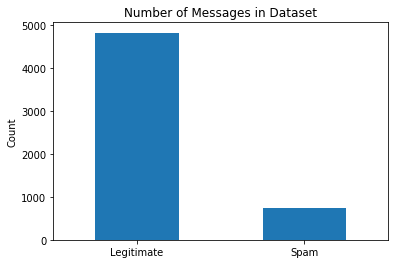

In [26]:
num = pd.value_counts(data['label'],sort=True).sort_index()
num.plot(kind='bar')
plt.title('Number of Messages in Dataset')
plt.xticks((0, 1), ("Legitimate", "Spam"), rotation=0)
plt.ylabel('Count')
# plt.show()
plt.savefig("images/histogram.png")

## Linear Regression
using sklearn

In [5]:
#https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
# convert text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer
text = TfidfVectorizer().fit_transform(data['text']).toarray()

# split data
X_train, X_test, y_train, y_test = train_test_split(text, data['label'])


In [6]:
# fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_hat = model.predict(X_test)
#from C2
def get_accuracy(t, t_hat):
    """
    Calculate accuracy,
    """

    # number correctly predicted / number total samples
    acc = np.sum(t == t_hat) / len(t)
    return acc

f"Accuracy for linear regression: {get_accuracy(y_test, y_hat)}"

'Accuracy for linear regression: 0.0'

## Logistic regression


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)
f"Accuracy for logistic regression: {get_accuracy(y_test, y_hat)}"

'Accuracy for logistic regression: 0.9626704953338119'

In [12]:
## naive bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train, y_train)
y_hat = mn.predict(X_test)
f"Accuracy for multinomial naive bayes: {get_accuracy(y_test, y_hat)}"

'Accuracy for multinomial naive bayes: 0.95908111988514'

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_hat = mlp.predict(X_test)
f"Accuracy for mlp: {get_accuracy(y_test, y_hat)}"

'Accuracy for mlp: 0.9813352476669059'